In [1]:
import torch
import torchvision
from networks.VAE import VAE_3hl
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Original data

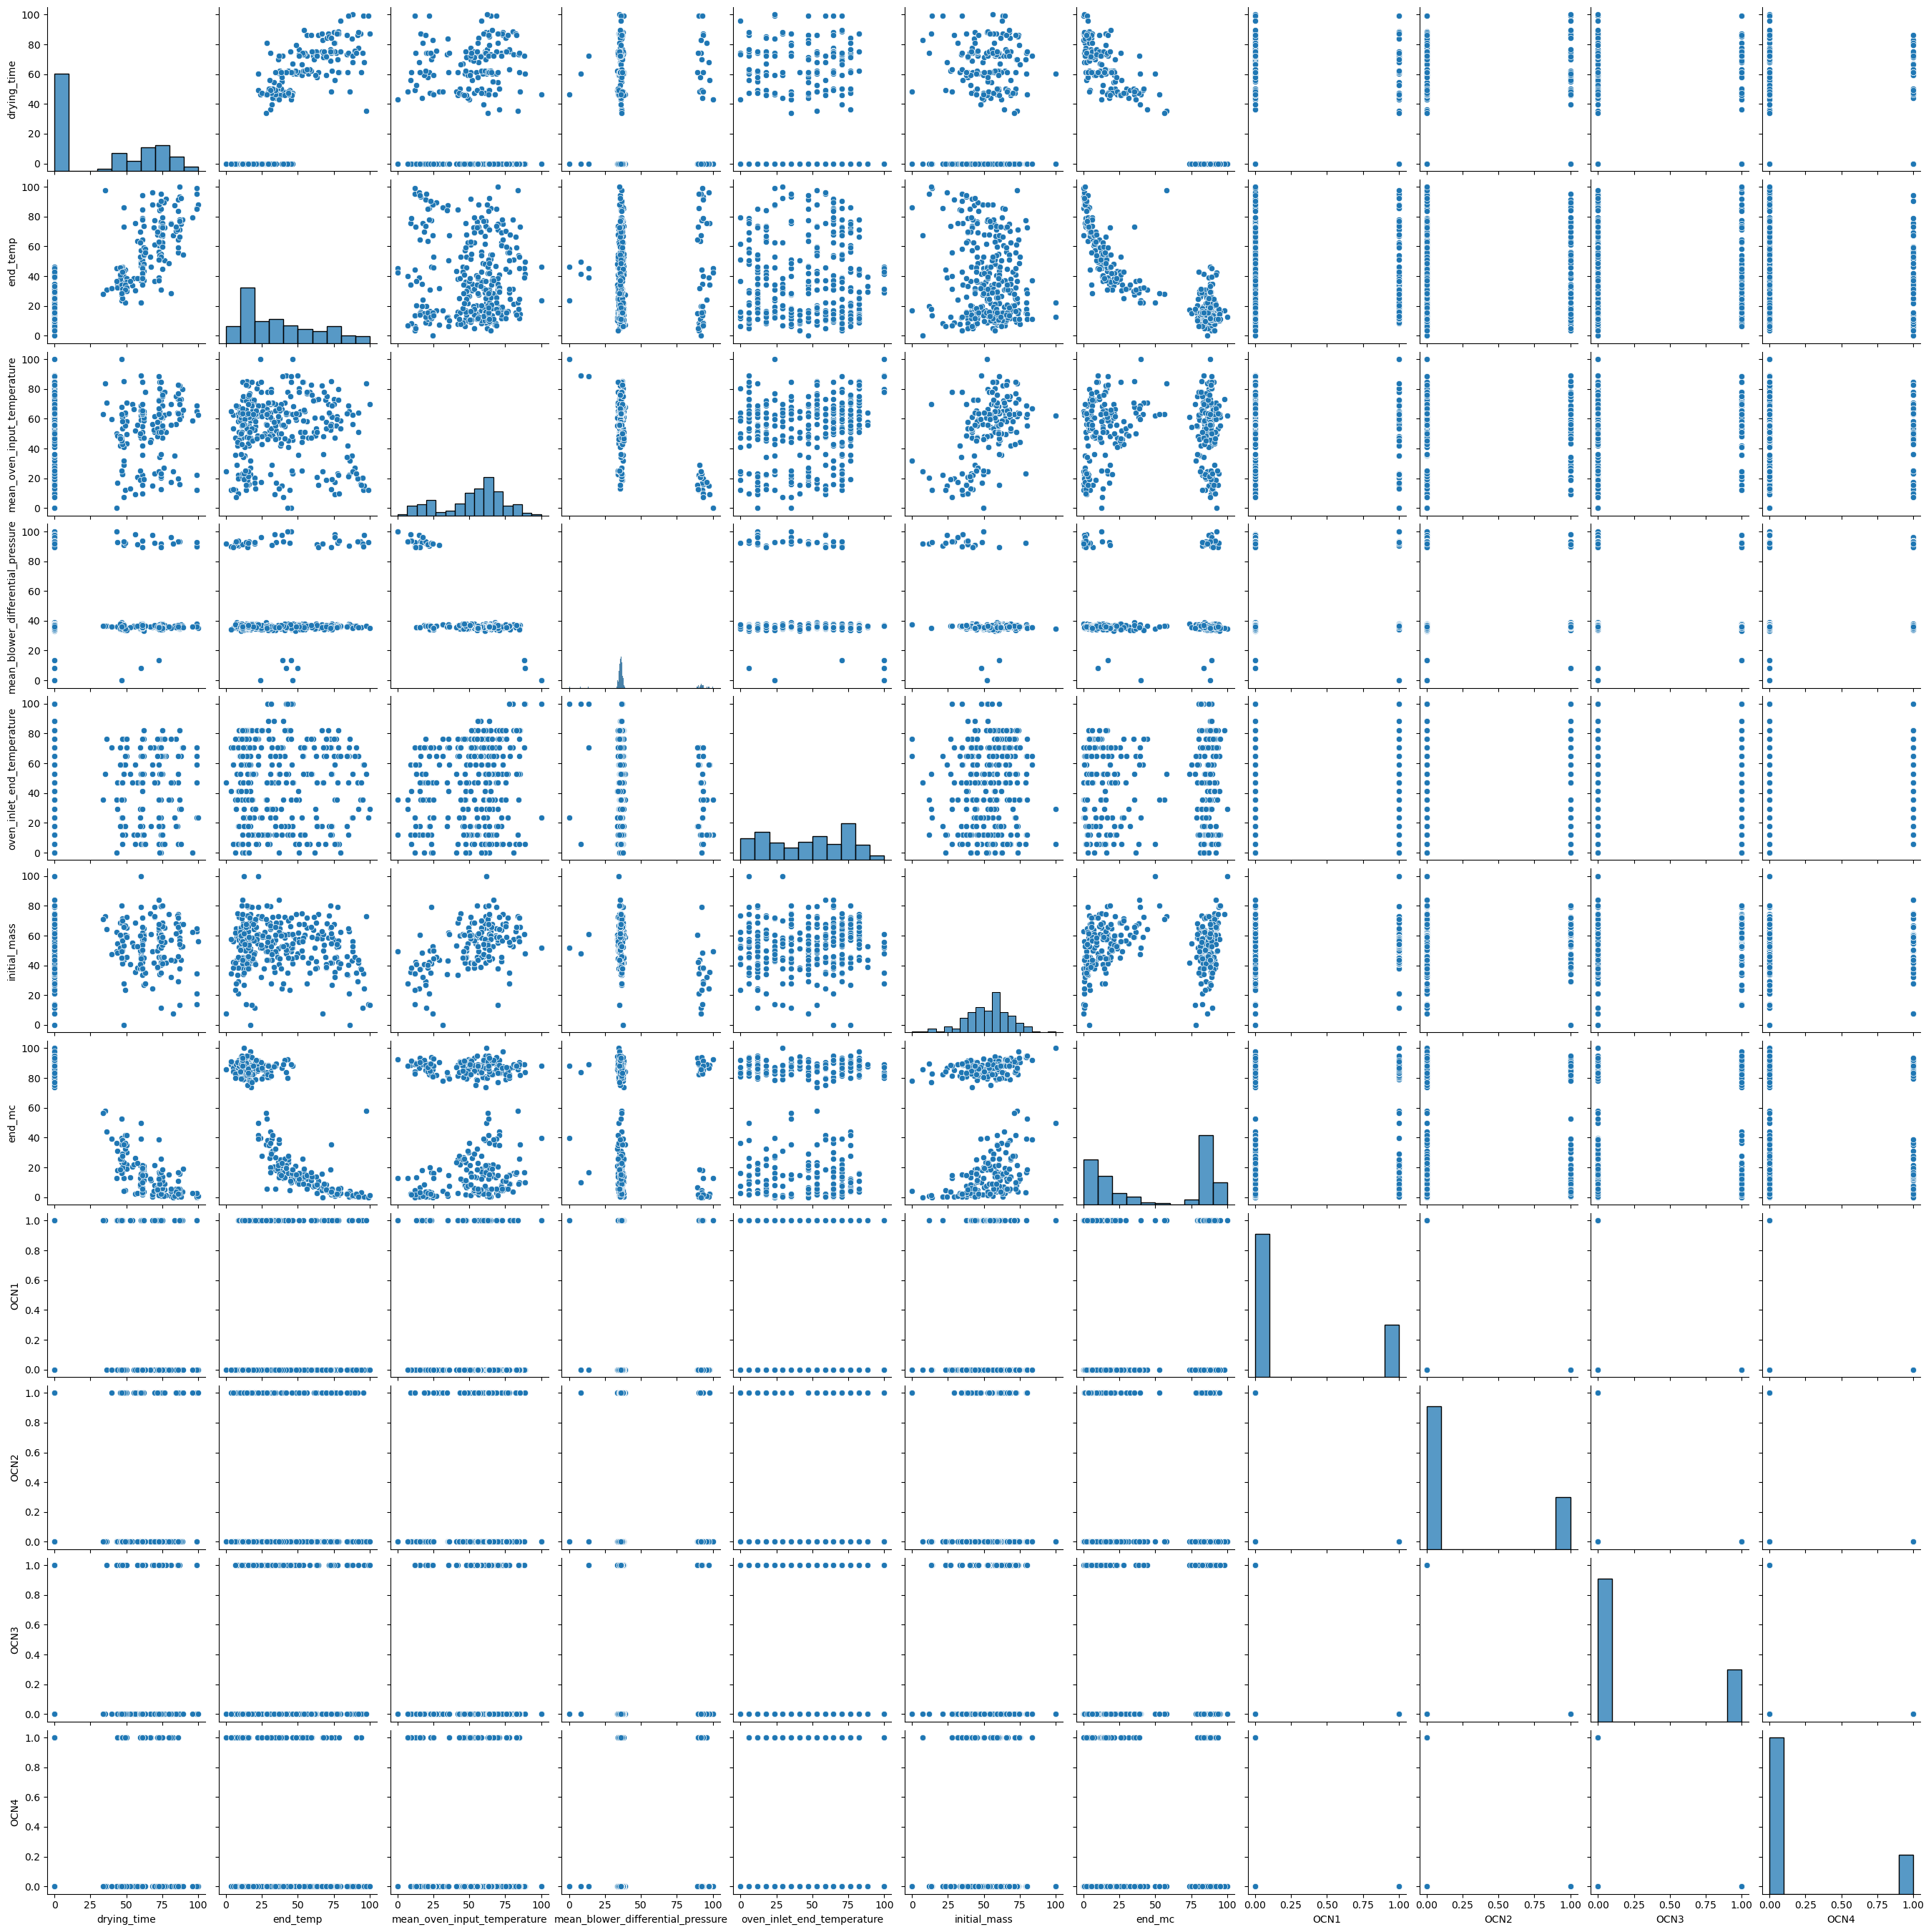

In [2]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])
sns.pairplot(orig_data_df)
plt.show()

<Figure size 640x480 with 0 Axes>

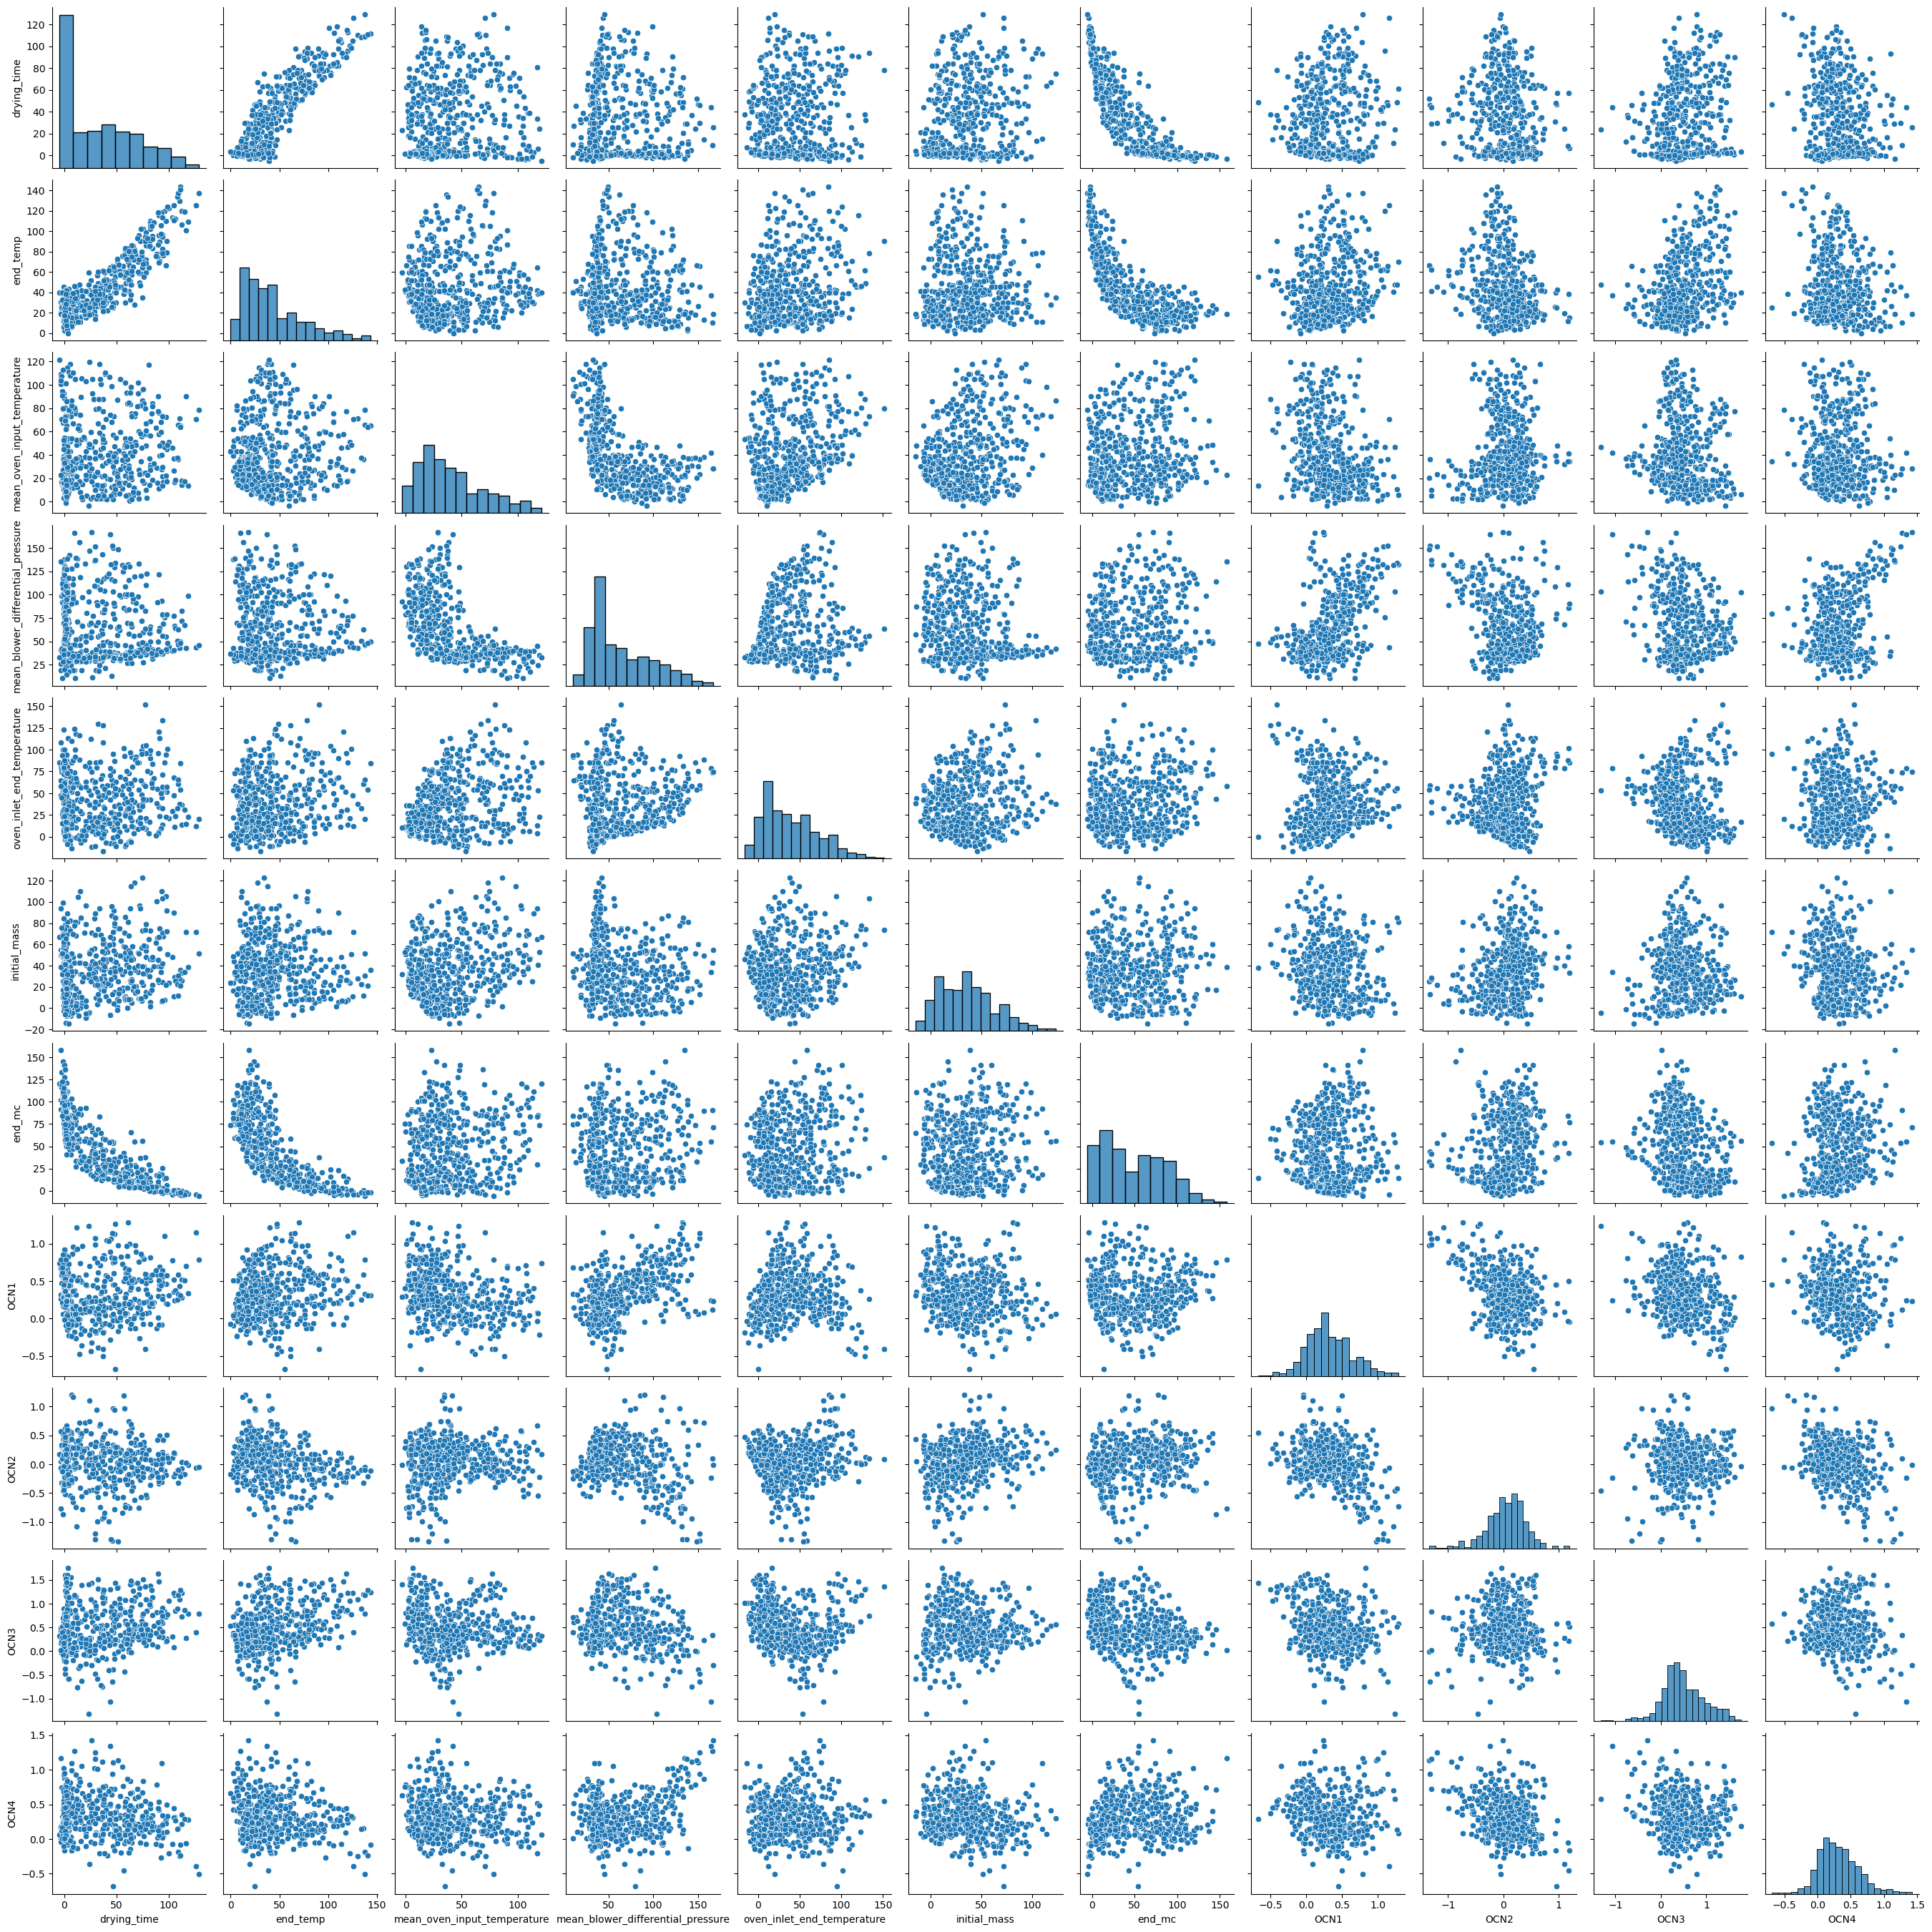

In [3]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])

vae = torch.load("trained_models/4d-exp0.pt")


encoded_data = vae.encoder(torch.tensor(orig_data_df.values).float())

# Draw random samples from the latent distribution as spanned by original data.
dims=4
samples = []
for dim in range(dims):
    dim_min = (encoded_data.detach().numpy())[:,dim].min()
    dim_max = (encoded_data.detach().numpy())[:,dim].max()
    samples.append((dim_max - dim_min)*np.random.rand(500)+dim_min)
    
random_samples = np.transpose(np.array(samples))

# decode the random samples:
data = vae.decoder(torch.tensor(random_samples).float()).detach().numpy()

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

In [4]:
original_data = pd.read_csv("dataset.csv")
orig_data_df = original_data [["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(orig_data_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
orig_data_df = pd.concat([orig_data_df, ocps],axis=1)
orig_data_df = orig_data_df.drop(columns=["oven_chamber_position"])

vae = torch.load("trained_models/3d-exp6.pt")


encoded_data = vae.encoder(torch.tensor(orig_data_df.values).float())

# Draw random samples from the latent distribution as spanned by original data.
dims=3
samples = []
for dim in range(dims):
    dim_min = (encoded_data.detach().numpy())[:,dim].min()
    dim_max = (encoded_data.detach().numpy())[:,dim].max()
    samples.append((dim_max - dim_min)*np.random.rand(500)+dim_min)
    
random_samples = np.transpose(np.array(samples))

# decode the random samples:
data = vae.decoder(torch.tensor(random_samples).float()).detach().numpy()

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

ModuleNotFoundError: No module named 'VAE'

# 5D

In [ ]:
vae = torch.load("5d-exp1.pt")

sample = vae.draw_sample()
sample = sample.float()

generated_data = vae.decoder(sample)

data = generated_data.detach().numpy()
col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

# 3D

<Figure size 640x480 with 0 Axes>

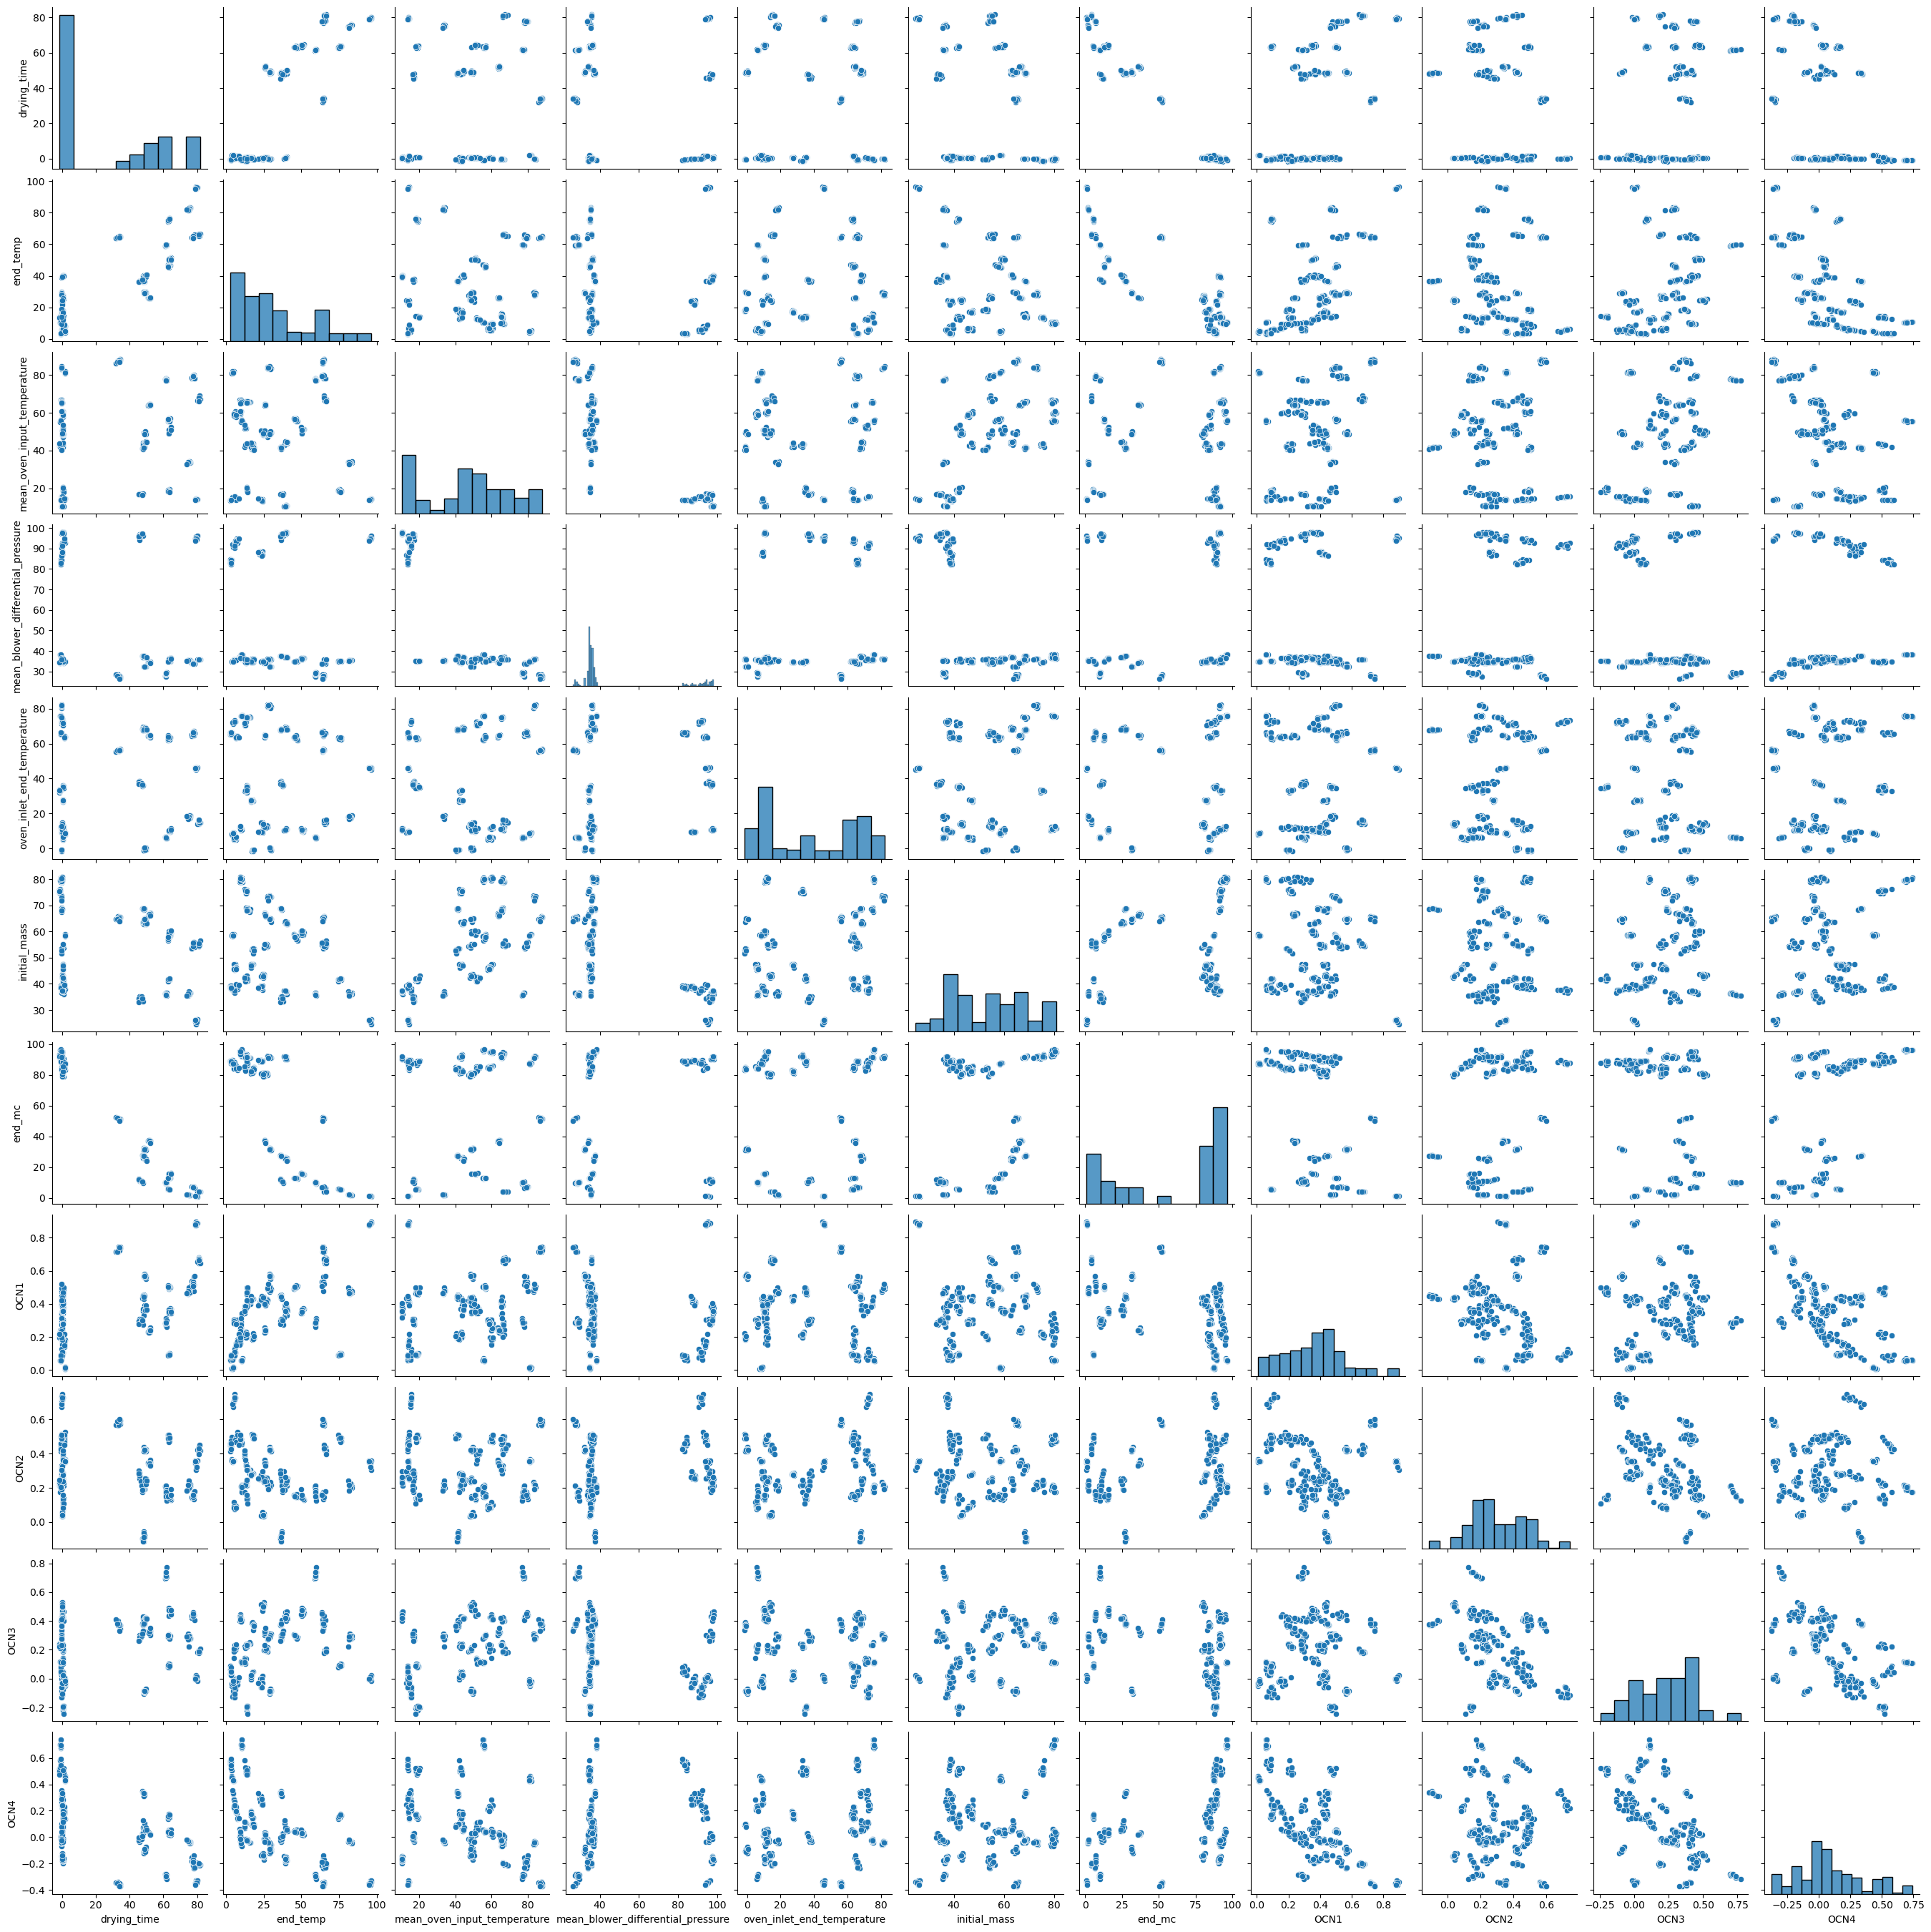

In [12]:
vae = torch.load("trained_models/4d-exp1.pt")

gen_data = []
for i in range(10):
    sample = vae.draw_sample()
    sample = sample.float()
    generated_data = vae.decoder(sample)
    data = generated_data.detach().numpy()
    gen_data.append(data)
    
data = np.concatenate(gen_data)

col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

In [13]:
a = vae.draw_sample().detach().numpy()
rng = np.random.default_rng()
rng.choice(a,10)

array([[ 0.3451687 ,  1.3968146 , -2.0320735 ,  1.6798211 ],
       [ 1.2381591 ,  0.83475745, -0.8852442 , -1.945735  ],
       [-1.5904473 , -0.77034104, -0.6906711 , -0.0935094 ],
       [-0.82419753, -0.3756461 ,  1.6080207 , -1.2598691 ],
       [-1.6945161 ,  0.52345014,  0.67885625,  0.28042787],
       [-0.82419753, -0.3756461 ,  1.6080207 , -1.2598691 ],
       [ 1.233275  ,  0.35969114, -0.23989266, -0.7720595 ],
       [-0.06897365, -0.12760395, -1.14698   , -1.699222  ],
       [ 1.0757805 , -0.7562845 ,  1.6777521 , -1.758781  ],
       [ 1.233275  ,  0.35969114, -0.23989266, -0.7720595 ]],
      dtype=float32)

In [14]:
generated_data_list = []
sample = vae.draw_sample()
sample = sample.float()
generated_data = vae.decoder(sample)
generated_data = generated_data.detach().numpy()
generated_data_list.append(generated_data)


In [15]:
generated_data = np.concatenate(generated_data_list,0)
rng.choice(generated_data,2)

array([[ 7.7795456e+01,  6.4487595e+01,  7.9466919e+01,  3.4013947e+01,
         6.5245117e+01,  5.5379673e+01,  7.1081333e+00,  5.0268769e-01,
         1.4750350e-01,  4.3763232e-01, -1.6674404e-01],
       [ 4.5200081e+01,  3.5842072e+01,  1.6646200e+01,  9.5076538e+01,
         3.8223038e+01,  3.5277985e+01,  1.2392380e+01,  3.1399059e-01,
         2.8669739e-01,  2.6504403e-01, -4.9845934e-02]], dtype=float32)

 # Establish baseline

In [1]:
import torch

df_list = []
# Load data
data_object = torch.load("results/datasets/exp5_all/models/data.pt")


x_train = data_object["x_training_folds"]
y_train = data_object["y_training_folds"]

x_test = data_object["x_test_folds"]
y_test = data_object["y_test_folds"]

# Load model
for i in range(10):
    model = torch.load(f"results/datasets/exp5_all/models/Bestmodel_{i}.pt")
    scaler = joblib.load(f"results/datasets/exp5_all/models/std_scaler_{i}.bin")
    
    # inference
    preds = model(x_test[i]).detach().numpy().transpose()[0]
    
    residuals = preds - y_test[i]
    
    df = pd.DataFrame(data=scaler.inverse_transform(x_test[i]),columns=["drying_time","end_temp","OCN_1","OCN_2","OCN_3","OCN_4","mean_oven_input_temperature","mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass"])
    df["fold"] = i
    df["end_rh"] = y_test[i]
    df["predictions"] = preds
    df_list.append(df)
    
ANN_WIC_df = pd.concat(df_list)    
ANN_WIC_df["residuals"] = ANN_WIC_df["end_rh"] - ANN_WIC_df["predictions"]
ANN_WIC_df.reset_index(drop=True,inplace=True)

ANN_WIC_df[["drying_time_scaled"]] = dt_scaler.transform(ANN_WIC_df[["drying_time"]])

C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: 'results/datasets/exp5_all/models/data.pt'

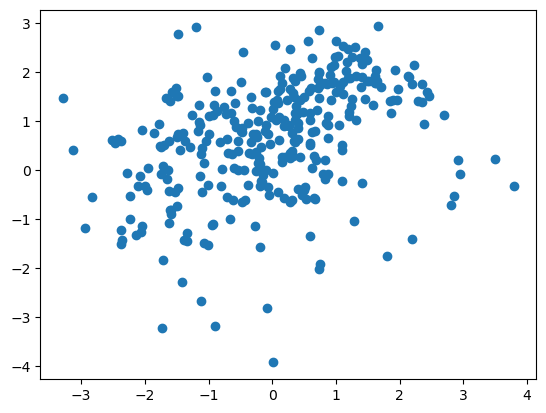

In [5]:
sample = vae.draw_sample()
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

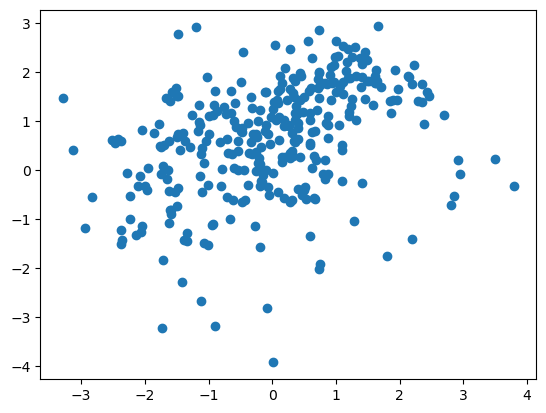

In [6]:
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

In [1]:
from utility.data_io import load_data_no_y
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_set = load_data_no_y('dataset',0)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(orig_data_df)


reduced_data = pca.transform(orig_data_df)

In [11]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2])
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [9]:
#x_train = DataLoader(train_set[train_index], batch_size=4, shuffle=True)
list(DataLoader(train_set[train_index],batch_size=32,shuffle=True))

NameError: name 'train_set' is not defined

In [89]:
TensorDataset(torch.from_numpy(np.array([1,2,3,4,5,6,7])).float())

In [92]:
for x in x_train:
    print(x)

RuntimeError: stack expects each tensor to be equal size, but got [258, 11] at entry 0 and [258] at entry 1

In [30]:
len(list(train_set))

292

In [32]:
len(list(test_set))

30